### plan right now

* determine bj range for phase transition
* determine t_c for a set of bj near that region
* run simulations, saving lattice snapshots every t_c / 10 for the shortest t_c (same interval for all models)
* compute speckle contrast of lattice diffraction images for each model
    * as a function of both beam size (kernel sigma)
    * and time delay (summed images)
* make a plot of contrast vs beam size / time delay
* measure the autocorrelation (time) and spatial correlation for all the models
    

In [1]:
%pylab inline
from ising import Model

Populating the interactive namespace from numpy and matplotlib


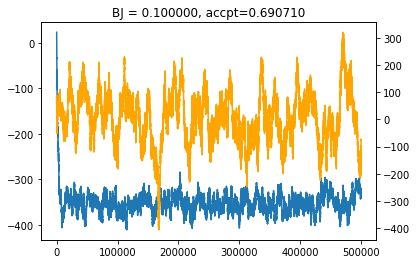

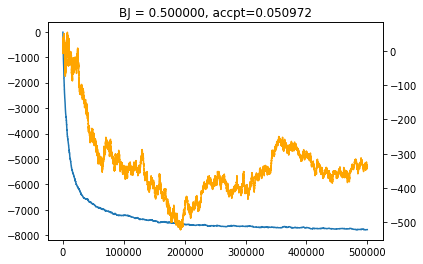

In [12]:
BJs = np.linspace(0.1, 0.5, 11)
sz = (64,64)

for BJ in [BJs.min(), BJs.max()]:

    m = Model(sz, BJ, save_interval=None, verbose=False)
    m.mc_steps(500000)
    #m.file.close()
    a = np.mean(m.accepted)

    figure()
    title('BJ = %f, accpt=%f' % (BJ, a))
    plot(m.energies)
    twinx()
    plot(m.mags, color='orange')
    show()

In [6]:
M = []

for BJ in BJs:

    m = Model(sz, BJ, verbose=False, save_interval=None)
    m.mc_steps(10000)
    a = np.mean(m.accepted)
    avg_m = np.mean(m.mags[-1000:])
    M.append(np.abs(avg_m))
    
figure()
scatter(BJs, M)
xlabel('Interaction Energy BJ')
ylabel('Magnetism M')
show()

KeyboardInterrupt: 